# Problem Statement
An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. The company markets its courses on several websites and search engines like Google. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone.

# Objective
Our objective is to select the most promising leads, i.e. the leads that are most likely to convert into paying customers.  The company requires us to build a model wherein we need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

### We will perform the following steps:
1. **Data Understanding**
    - Importing the Leads data file
    - Understanding the data
    
    
2. **Data Cleaning**
    - Replacing 'Select' values
    - Handling missing Values
    - Grouping small categories into 'others'
    - Dropping Unnecessary Columns

3. **Outlier Analysis**

4. **Exploratory Data Analysis**
   - Univariate Analysis
   - Bivariate Analysis
    
    




5. **Data Preparation**
   - Binary Variable conversion
   - Categorical Variables conversion
   - Dropping repeated variable
   - Performing test-train split
   - Feaure Scaling
   
   
6. **Model Building**
   - Model 1: using all the variables
   - Model 2: Using RFE, with 15 variables
   - Model Evaluation
   - Finding Optimal Threshold
   - Making prediction on the test set 
   
7. **Final score calculation**

# <font color='blue'>1. Understanding Data</font>

In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import confusion_matrix
from matplotlib.pyplot import xticks

from sklearn.feature_selection import VarianceThreshold

In [2]:
pd.set_option('display.max_columns', None)

In [4]:
# Importing the Leads data file
leads_data = pd.read_csv('Leads.csv')
leads_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [6]:
# Understanding the data
leads_data.shape

(9240, 37)

In [7]:
# Understanding the data
leads_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [8]:
leads_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


# <font color='blue'>2. Cleaning Data</font>
- Replacing 'Select' values
- Handling missing Values
- Dropping Unnecessary Columns
- Grouping small categories into 'others'

### 2.1. Replacing 'Select' values
We can obsrve that many of the categorical variables have a level called 'Select' which needs to be handled because it is as good as a null value.

In [9]:
# categorical variables having 'Select' level
col_with_select = [col for col in leads_data.columns if 'Select' in leads_data[col].value_counts().index]
col_with_select    

['Specialization',
 'How did you hear about X Education',
 'Lead Profile',
 'City']

As the customer did not select any option provided to them, 'Select' option is assigned in that field by default. So it is better to replace 'Select' with Nan

In [10]:
# Replacing Select labels with NaN
for col in col_with_select:
    leads_data[col].replace('Select',np.nan,inplace=True);

In [11]:
# Re-checking whether all select labels have be removed or not
[col for col in leads_data.columns if 'Select' in leads_data[col].value_counts().index]

[]

### 2.2. Handling Missing Values

In [12]:
# percentage of null values present in each column
missing_val_col = round(leads_data.isnull().sum()/len(leads_data) *100,2)
missing_val_col

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

We can see that there are columns with more than 45% missing values. So we will drop those columns since they will not provide any information.

In [13]:
# Columns with more than 45% values missing
missing_col_45 = [col for col in missing_val_col.index if missing_val_col[col] >45 ]
missing_col_45

['How did you hear about X Education',
 'Lead Quality',
 'Lead Profile',
 'Asymmetrique Activity Index',
 'Asymmetrique Profile Index',
 'Asymmetrique Activity Score',
 'Asymmetrique Profile Score']

In [14]:
# drop these columns
leads_data.drop(missing_col_45,axis =1, inplace = True)

In [15]:
missing_val_col = round(leads_data.isnull().sum()/len(leads_data) *100,2)
missing_val_col

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

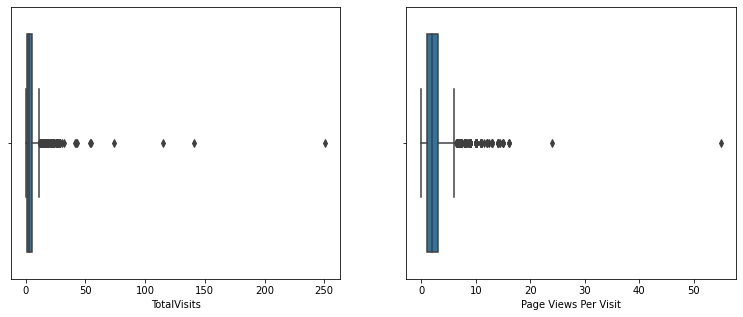

In [16]:
plt.figure(figsize=(13,5))
plt.subplot(1, 2, 1)
sns.boxplot(leads_data['TotalVisits']);
plt.subplot(1, 2, 2);
sns.boxplot(leads_data['Page Views Per Visit']);
plt.show()

We can see some columns with very less percentage of null values like <b>`TotalVisits, Page Views Per Visit, Last Activity`</b>. We will impute <b>`TotalVisits, Page Views Per Visit`</b> columns with median and not with mean since we can see presence of outlier in these variables. We will impute <b>`Last Activity`</b> with mode value as it is categorical.

In [31]:
# Impute TotalVisits, Page Views Per Visit with median
leads_data['TotalVisits'].fillna(leads_data['TotalVisits'].median(),inplace = True)
leads_data['Page Views Per Visit'].fillna(leads_data['Page Views Per Visit'].median(),inplace = True)

# Impute Last Activity with mode value as it is categorical
leads_data['Last Activity'].fillna(leads_data['Last Activity'].mode()[0], inplace = True)

In [32]:
# re-checking for missing values
round(leads_data.isnull().sum()/len(leads_data) *100,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       0.00
Total Time Spent on Website                       0.00
Page Views Per Visit                              0.00
Last Activity                                     0.00
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

### 2.3. Dropping Unnecessary Columns

Dropping the variable `Tags` as it is generated after the discussion with students by the sales department.

In [36]:
leads_data.drop(['Tags'],axis =1, inplace = True)

In [37]:
for col in leads_data.columns:
    print('----------{0}----------'.format(col))
    print(leads_data[col].value_counts(normalize=True))

----------Prospect ID----------
f18a3fb3-a1c5-4f91-a915-7f21aca3ee8d    0.000108
7bd9ca6a-000b-40f5-8583-47a0f0561bde    0.000108
e832e23e-839c-4b1c-a2be-d767bfa79d63    0.000108
dbcde5e4-cc6b-4057-9b38-1da8da311e99    0.000108
e0ec8f30-0787-440d-ab88-a39cce595bd3    0.000108
                                          ...   
950b852d-91f3-483c-a1d9-fcf5b2d31893    0.000108
186882cb-862f-432d-a718-8fbe2b8b64c6    0.000108
3f561040-bd78-4d28-9487-0f4d4020467e    0.000108
eecf3981-028f-4a83-9801-afa36545a53c    0.000108
e2d06996-92b9-433c-a3c2-94f125a89365    0.000108
Name: Prospect ID, Length: 9240, dtype: float64
----------Lead Number----------
608255    0.000108
596233    0.000108
656682    0.000108
592824    0.000108
652580    0.000108
            ...   
631489    0.000108
600768    0.000108
598556    0.000108
616923    0.000108
655360    0.000108
Name: Lead Number, Length: 9240, dtype: float64
----------Lead Origin----------
Landing Page Submission    0.528788
API                     

We can observe that the columns <b>`Search, Magazine, Newspaper Article, X Education Forums, Newspaper, Digital Advertisement, Through Recommendations, Receive More Updates About Our Courses, Update me on Supply Chain Content, Get updates on DM Content, I agree to pay the amount through cheque`</b> are highly skewed towards a particular category, as this will not help us in our analysis we will drop these columns.


In [38]:
skewed_col_list = ["Do Not Call","Search","Magazine", "Newspaper Article", "X Education Forums", "Newspaper", "Digital Advertisement", "Through Recommendations", "Receive More Updates About Our Courses", "Update me on Supply Chain Content", "Get updates on DM Content", "I agree to pay the amount through cheque"]
# Deleting the columns
leads_data.drop(skewed_col_list, axis=1 , inplace=True )

In [39]:
round(leads_data.isnull().sum()/len(leads_data) *100,2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Converted                                         0.00
TotalVisits                                       0.00
Total Time Spent on Website                       0.00
Page Views Per Visit                              0.00
Last Activity                                     0.00
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
City                                             39.71
A free copy of Mastering The Interview            0.00
Last Notable Activity                             0.00
dtype: float64

In [40]:
# Let's start with first columns of missing values
leads_data['Lead Source'].value_counts()   # Lead Source column

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Live Chat               2
Social Media            2
WeLearn                 1
welearnblog_Home        1
youtubechannel          1
NC_EDM                  1
blog                    1
Pay per Click Ads       1
testone                 1
Name: Lead Source, dtype: int64

In [41]:
leads_data['Lead Source'] = leads_data['Lead Source'].replace(np.nan,'Google')

In [42]:
#There seems to be 5 values as google instead of Google, we will replace those with Google
leads_data['Lead Source'] = leads_data['Lead Source'].replace('google','Google')

In [43]:
leads_data['Country'].value_counts().head(5) #Country column

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
Name: Country, dtype: int64

In [44]:
leads_data['Country'] = leads_data['Country'].replace(np.nan,'India')

In [45]:
#checking value counts of "City" column

leads_data['City'].value_counts(dropna=False)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [46]:
leads_data['City'] = leads_data['City'].replace(np.nan,'Mumbai')

In [47]:
#checking value counts of Specialization column

leads_data['Specialization'].value_counts(dropna=False)

NaN                                  3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [48]:
# Lead may not have mentioned specialization because it was not in the list or maybe they are a students 
# and don't have a specialization yet. So we will replace NaN values here with 'Not Specified'

leads_data['Specialization'] = leads_data['Specialization'].replace(np.nan, 'Not Specified')

In [49]:
leads_data['What is your current occupation'].value_counts(dropna=False)

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [50]:
leads_data['What is your current occupation'] = leads_data['What is your current occupation'].replace(np.nan, 'Unemployed')

In [51]:
leads_data['What matters most to you in choosing a course'].value_counts(dropna=False)

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [52]:
leads_data['What matters most to you in choosing a course'] = leads_data['What matters most to you in choosing a course'].replace(np.nan, 'Better Career Prospects')

In [53]:
round(leads_data.isnull().sum()/len(leads_data) *100,2)

Prospect ID                                      0.0
Lead Number                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
City                                             0.0
A free copy of Mastering The Interview           0.0
Last Notable Activity                            0.0
dtype: float64

#### Now there is no missing values remaining in dataset

### 2.4. Grouping small categories into 'others'

In [54]:
for col in leads_data.columns:
    print('----------{0}----------'.format(col))
    print(leads_data[col].value_counts())

----------Prospect ID----------
f18a3fb3-a1c5-4f91-a915-7f21aca3ee8d    1
7bd9ca6a-000b-40f5-8583-47a0f0561bde    1
e832e23e-839c-4b1c-a2be-d767bfa79d63    1
dbcde5e4-cc6b-4057-9b38-1da8da311e99    1
e0ec8f30-0787-440d-ab88-a39cce595bd3    1
                                       ..
950b852d-91f3-483c-a1d9-fcf5b2d31893    1
186882cb-862f-432d-a718-8fbe2b8b64c6    1
3f561040-bd78-4d28-9487-0f4d4020467e    1
eecf3981-028f-4a83-9801-afa36545a53c    1
e2d06996-92b9-433c-a3c2-94f125a89365    1
Name: Prospect ID, Length: 9240, dtype: int64
----------Lead Number----------
608255    1
596233    1
656682    1
592824    1
652580    1
         ..
631489    1
600768    1
598556    1
616923    1
655360    1
Name: Lead Number, Length: 9240, dtype: int64
----------Lead Origin----------
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
----------Lead Source-----

We can notice some columns like <b>`Last Activity, Country, What is your current occupation, What matters most to you in choosing a course, Last Notable Activity, Lead Source`</b> having small percentage of categories. We will combine them into a new category called as 'Others'

In [55]:
def grouping_other(col):
    new_data = leads_data[col].value_counts()[leads_data[col].value_counts() < 30].index
    leads_data[col] = leads_data[col].apply(lambda x: x.replace(x, 'Others') if x in new_data else x)

In [56]:
selected_grouping_col = ['Last Activity', 'Country', 'What is your current occupation', 'What matters most to you in choosing a course', 'Last Notable Activity', 'Lead Source']

In [57]:
for col in selected_grouping_col:
    grouping_other(col)

# <font color='blue'>3. Outlier Analysis</font>

In [58]:
categorical_var = ['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity', 'Country', 'Specialization', 'What is your current occupation', 'What matters most to you in choosing a course', 'City', 'A free copy of Mastering The Interview', 'Last Notable Activity', 'Converted']
numerical_var = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']

In [59]:
leads_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000,9240.000000
mean,617188.435606,0.385390,3.438636,487.698268,2.357440
std,23405.995698,0.486714,4.819024,548.021466,2.145781
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000


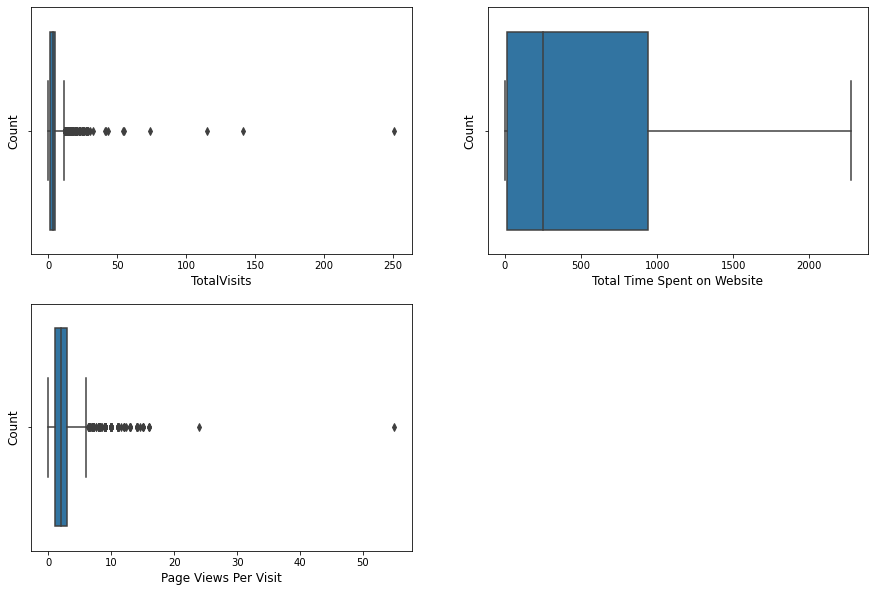

In [60]:
# Boxplot 
plt.figure(figsize=(15,10))
for i,col in enumerate(numerical_var):
    plt.subplot(2,2,i+1);
    sns.boxplot(leads_data[col])
    plt.xlabel(col,fontdict={'fontsize':12})
    plt.ylabel("Count",fontdict={'fontsize':12})


<b>`INFERENCE :`</b><br>
We can observe the presence of outlier in `TotalVisits, Page Views Per Visit`

### 3.3 Outlier Removal
As we can see there are a number of outliers in the data. We will cap the outliers to 95% value for analysis.

In [61]:
percentiles = leads_data['Page Views Per Visit'].quantile([0.05,0.95]).values
leads_data['Page Views Per Visit'][leads_data['Page Views Per Visit'] < percentiles[0]] = percentiles[0]
leads_data['Page Views Per Visit'][leads_data['Page Views Per Visit'] >= percentiles[1]] = percentiles[1]

In [62]:
percentiles = leads_data['TotalVisits'].quantile([0.05,0.95]).values
leads_data['TotalVisits'][leads_data['TotalVisits'] < percentiles[0]] = percentiles[0]
leads_data['TotalVisits'][leads_data['TotalVisits'] >= percentiles[1]] = percentiles[1]

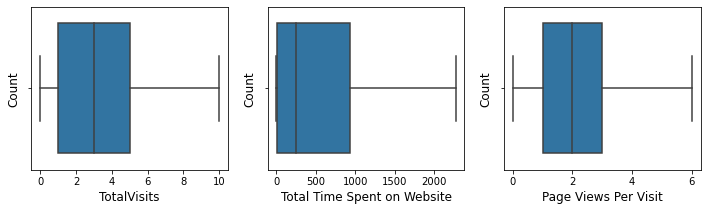

In [63]:
# after capping outliers
plt.figure(figsize=(12,3))
for i,col in enumerate(numerical_var):
    plt.subplot(1,3,i+1);
    sns.boxplot(leads_data[col])
    plt.xlabel(col,fontdict={'fontsize':12})
    plt.ylabel("Count",fontdict={'fontsize':12})

# <font color='blue'>4. Exploratory Data Analysis</font>
### 4.1 Univariate Analysis

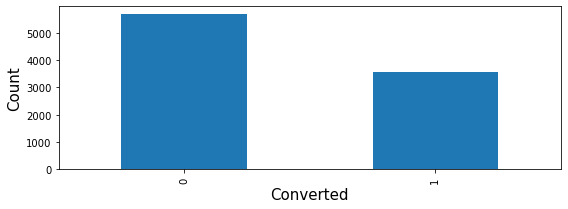

In [64]:
plt.figure(figsize=(9,3))
leads_data['Converted'].value_counts().plot.bar();
plt.xlabel('Converted',fontdict={'fontsize':15})
plt.ylabel('Count',fontdict={'fontsize':15})
plt.show()

In [65]:
print((sum(leads_data['Converted'])/len(leads_data['Converted'].index))*100)

38.53896103896104


<b>Rate of conversion</b> is almost `39%`

### 4.2 Bivariate Analysis

#### Categorical vs Categorical

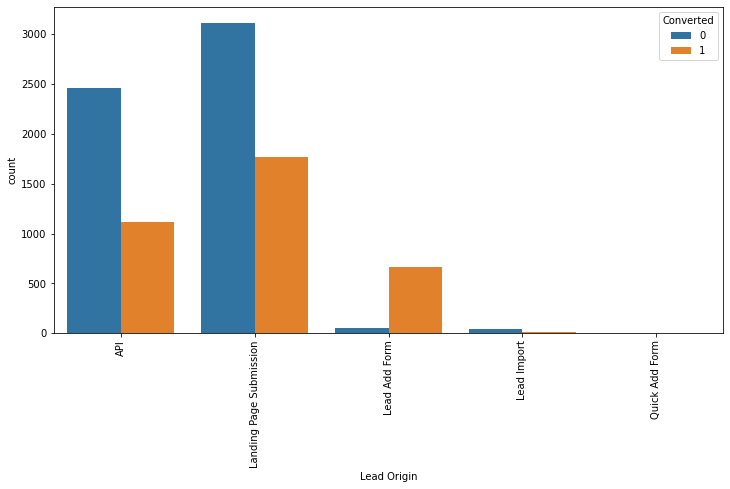

In [66]:
# Lead Origin vs Converted
plt.figure(figsize=(12,6))
sns.countplot(x= 'Lead Origin', hue='Converted', data=leads_data)
xticks(rotation = 90)
plt.show()

In [67]:
leads_data[leads_data['Lead Origin']=='Lead Add Form']['Converted'].value_counts(normalize= True)

1    0.924791
0    0.075209
Name: Converted, dtype: float64

In [68]:
leads_data[leads_data['Lead Origin']=='Landing Page Submission']['Converted'].value_counts(normalize= True)

0    0.63815
1    0.36185
Name: Converted, dtype: float64

In [69]:
leads_data[leads_data['Lead Origin']=='API']['Converted'].value_counts(normalize= True)

0    0.688547
1    0.311453
Name: Converted, dtype: float64

<b>`INFERENCE: `</b><br>
- There are more number of leads with `Landing Page Submission` and `API` as origin, but rate of convertion is close to 30%. Company should focus on improving leads with `Landing Page Submission` as origin.
- Rate of conversion is very high when origin is `Lead Add Form`. Company should focus on getting more leads from these origin.

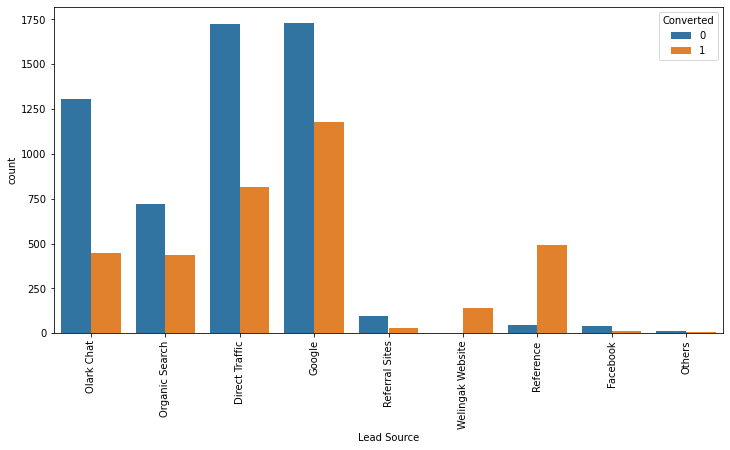

In [70]:
# Lead Source vs Converted
plt.figure(figsize=(12,6))
sns.countplot(x= 'Lead Source', hue='Converted', data=leads_data)
xticks(rotation = 90)
plt.show()

<b>`INFERENCE: `</b></br>
- Leads that got converted comes mostly from `Direct Traffic`, `Google` sources.
- Rate of conversion is more for leads comming from `Reference` and `Welingak Websites`.So company should more leads from these sources.
- Inorder to improve Converstion rate, company should focus on converting leads comming from `Direct Traffic, Google, Olark Chat, and Organic Search`.

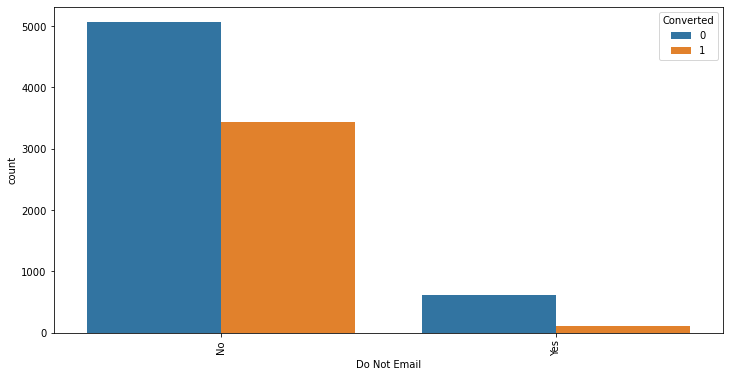

In [71]:
# Do Not Email vs Converted
plt.figure(figsize=(12,6))
sns.countplot(x= 'Do Not Email', hue='Converted', data=leads_data)
xticks(rotation = 90)
plt.show()

In [72]:
leads_data[leads_data['Do Not Email']=='No']['Converted'].value_counts(normalize= True)

0    0.595227
1    0.404773
Name: Converted, dtype: float64

In [73]:
leads_data[leads_data['Do Not Email']=='Yes']['Converted'].value_counts(normalize= True)

0    0.839237
1    0.160763
Name: Converted, dtype: float64

<b>`INFERENCE: `</b><br>
We can observe that rate of conversion is more for customers who have opted to receive mails regarding course(40% are converted).

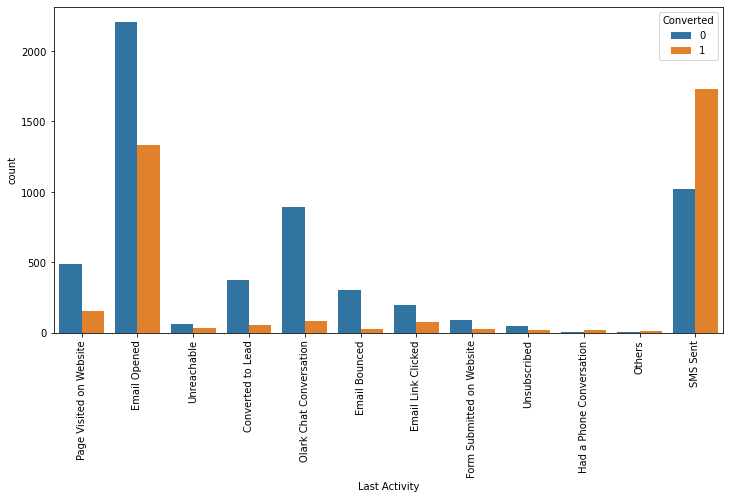

In [74]:
# Last Activity vs Converted
plt.figure(figsize=(12,6))
sns.countplot(x= 'Last Activity', hue='Converted', data=leads_data)
xticks(rotation = 90)
plt.show()

In [75]:
leads_data[leads_data['Last Activity']=='SMS Sent']['Converted'].value_counts(normalize= True)

1    0.629144
0    0.370856
Name: Converted, dtype: float64

In [76]:
leads_data[leads_data['Last Activity']=='Olark Chat Conversation']['Converted'].value_counts(normalize= True)

0    0.913669
1    0.086331
Name: Converted, dtype: float64

<b>`INFERENCE: `</b><br>
- Rate of conversion is more for the customers whose last activity was `SMS Sent`(62% customer got converted ). 
- Where as Rate of conversion is very low for for the customers whose last activity was `Olark Chat Conversation`. Company should focus on improving leads for customers with last activity as `Olark Chat Conversation`.

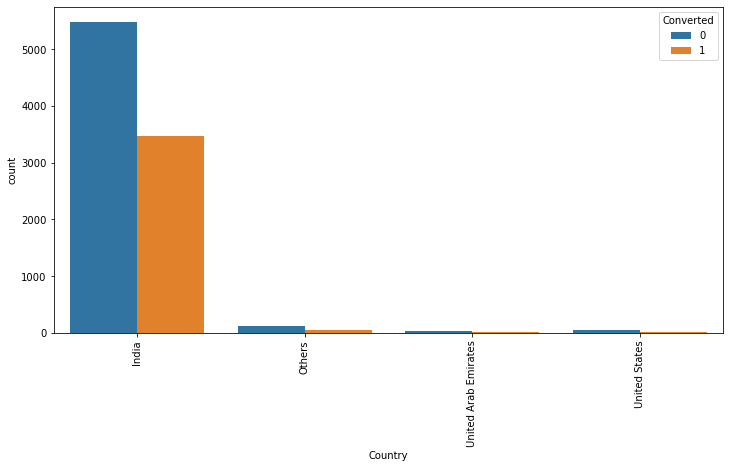

In [77]:
# Country vs Converted
plt.figure(figsize=(12,6))
sns.countplot(x= 'Country', hue='Converted', data=leads_data)
xticks(rotation = 90)
plt.show()

<b>`INFERENCE: `</b><br> 
Customers who got converted are mostly from India

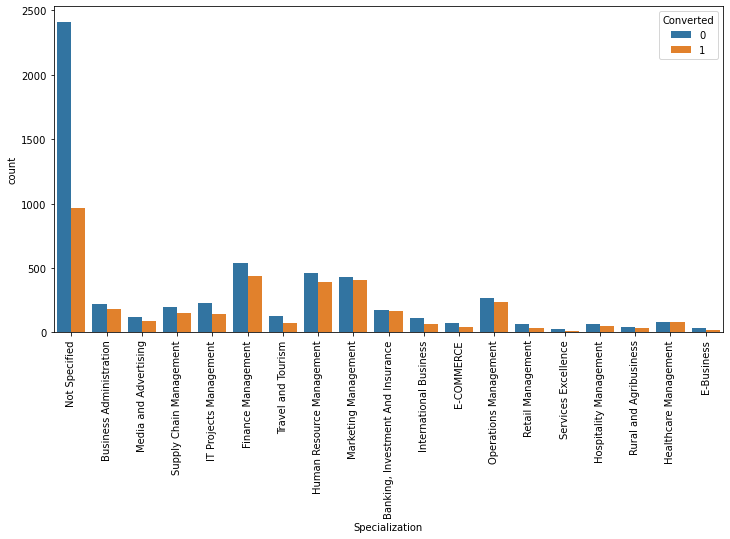

In [78]:
# Specialization vs Converted
plt.figure(figsize=(12,6))
sns.countplot(x= 'Specialization', hue='Converted', data=leads_data)
xticks(rotation = 90)
plt.show()

In [79]:
leads_data[leads_data['Specialization']=='Human Resource Management']['Converted'].value_counts(normalize= True)

0    0.542453
1    0.457547
Name: Converted, dtype: float64

In [80]:
leads_data[leads_data['Specialization']=='Marketing Management']['Converted'].value_counts(normalize= True)

0    0.513126
1    0.486874
Name: Converted, dtype: float64

In [81]:
leads_data[leads_data['Specialization']=='Finance Management']['Converted'].value_counts(normalize= True)

0    0.553279
1    0.446721
Name: Converted, dtype: float64

In [82]:
leads_data[leads_data['Specialization']=='Operations Management']['Converted'].value_counts(normalize= True)

0    0.526839
1    0.473161
Name: Converted, dtype: float64

In [83]:
leads_data[leads_data['Specialization']=='Healthcare Management']['Converted'].value_counts(normalize= True)

0    0.503145
1    0.496855
Name: Converted, dtype: float64

In [84]:
leads_data[leads_data['Specialization']=='Finance Management']['Converted'].value_counts(normalize= True)

0    0.553279
1    0.446721
Name: Converted, dtype: float64

<b>`INFERENCE: `</b><br>
- Leads who got converted most are from `Finance Management` Specialization.
- Rate of conversion is more for leads from `HR Management`, `Marketing Management`, `Finance Management`, `Operation Management`,`Healthcare Management` Specialization.

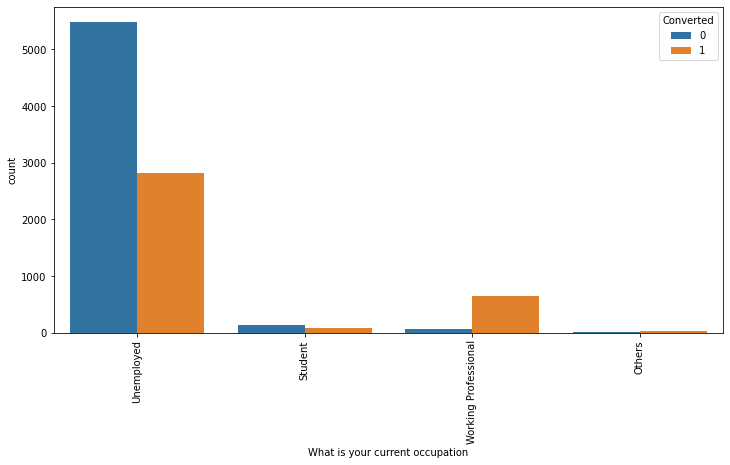

In [85]:
# What is your current occupation vs Converted
plt.figure(figsize=(12,6))
sns.countplot(x= 'What is your current occupation', hue='Converted', data=leads_data)
xticks(rotation = 90)
plt.show()

In [86]:
leads_data[leads_data['What is your current occupation']=='Working Professional']['Converted'].value_counts(normalize= True)

1    0.916431
0    0.083569
Name: Converted, dtype: float64

In [87]:
leads_data[leads_data['What is your current occupation']=='Unemployed']['Converted'].value_counts(normalize= True)

0    0.660917
1    0.339083
Name: Converted, dtype: float64

In [88]:
leads_data[leads_data['What is your current occupation']=='Student']['Converted'].value_counts(normalize= True)

0    0.628571
1    0.371429
Name: Converted, dtype: float64

In [89]:
leads_data[leads_data['What is your current occupation']=='Others']['Converted'].value_counts(normalize= True)

1    0.735294
0    0.264706
Name: Converted, dtype: float64

<b>`INFERENCE: `</b><br>
- Rate of Conversion is very high(92%) for `Working Professionals`. Company should focus on getting more leads who are `Working Professionals`.
- There are more number of leads who are `Unemployed`. But rate of getting converted is almost 33%. SO company should focus on improving leads who are `unemployed`.

In [90]:
# Describing what matters most to you in choosing a course

leads_data['What matters most to you in choosing a course'].describe()

count                        9240
unique                          2
top       Better Career Prospects
freq                         9237
Name: What matters most to you in choosing a course, dtype: object

<b>`INFERENCE: `</b><br>
Most leads opted for  `Better Career Prospects` as the reason for choosing a course.

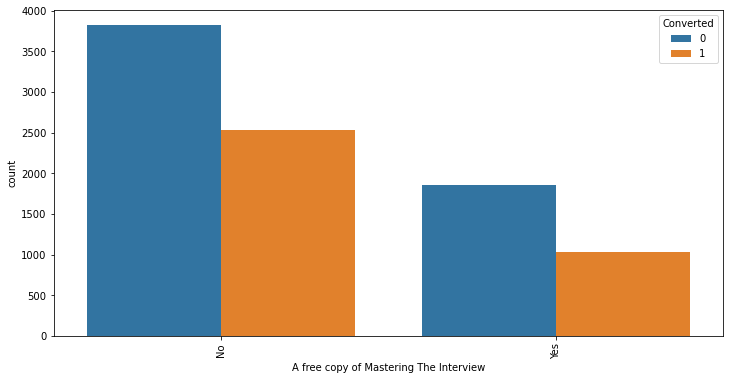

In [91]:
# A free copy of Mastering The Interview vs Converted
plt.figure(figsize=(12,6))
sns.countplot(x= 'A free copy of Mastering The Interview', hue='Converted', data=leads_data)
xticks(rotation = 90)
plt.show()

In [92]:
leads_data[leads_data['A free copy of Mastering The Interview']=='No']['Converted'].value_counts(normalize= True)

0    0.601543
1    0.398457
Name: Converted, dtype: float64

In [93]:
leads_data[leads_data['A free copy of Mastering The Interview']=='Yes']['Converted'].value_counts(normalize= True)

0    0.643352
1    0.356648
Name: Converted, dtype: float64

<b>`INFERENCE: `</b><br>
Rate of converstion is almost similar for Yes and No, So inference can be drawn as such.

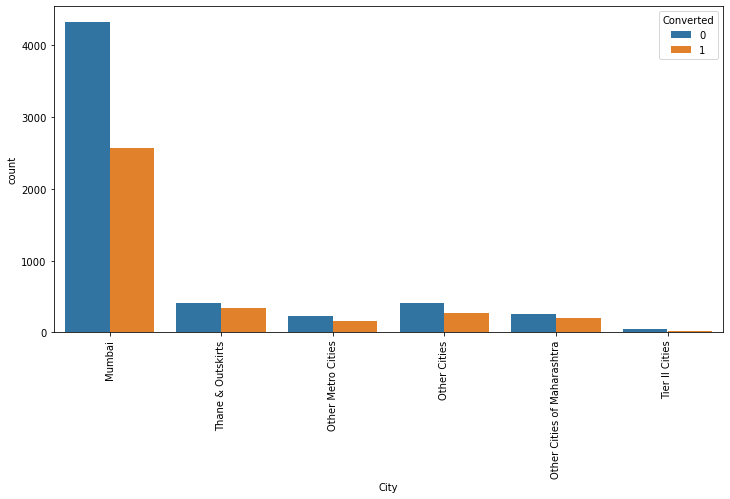

In [94]:
# City vs Converted
plt.figure(figsize=(12,6))
sns.countplot(x= 'City', hue='Converted', data=leads_data)
xticks(rotation = 90)
plt.show()

In [95]:
leads_data[leads_data['City']=='Mumbai']['Converted'].value_counts(normalize= True)

0    0.62763
1    0.37237
Name: Converted, dtype: float64

<b>`INFERENCE: `</b><br>
- Most of the leads are form `Mumbai`.But the rate of convertion is almost 37%. Company should improving leads fron Mumbai city.

#### Categorical vs Numerical Variable

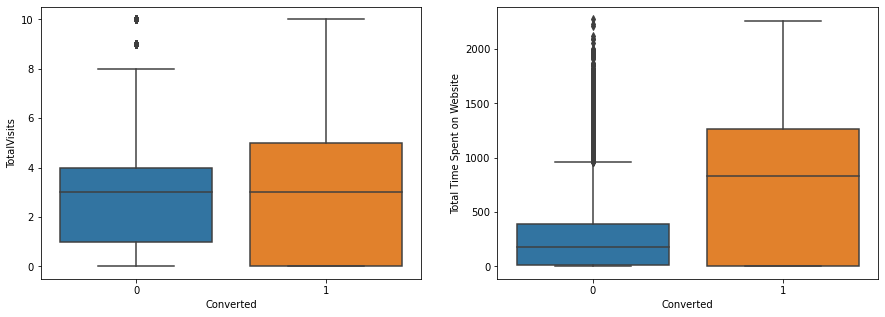

In [96]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = leads_data)

plt.subplot(1,2,2)
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted', data = leads_data)

plt.show()

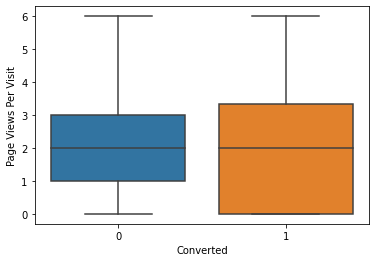

In [97]:
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = leads_data)
plt.show()

<b>`INFERENCE: `</b><br>
- Median for converted and not converted leads are the same for `Page Views Per Visit` and `TotalVisits`.
- Leads spending more time on the weblise are more likely to be converted. Website should be made more engaging to make leads spend more time.

### Numerical vs Numerical Variable

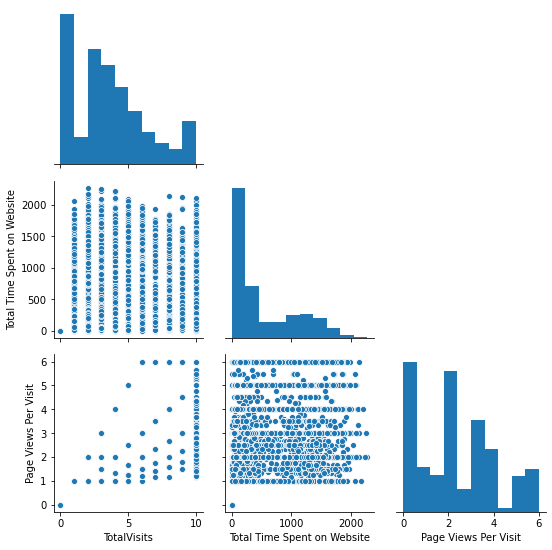

In [98]:
sns.pairplot(leads_data[numerical_var], corner=True)
plt.show()

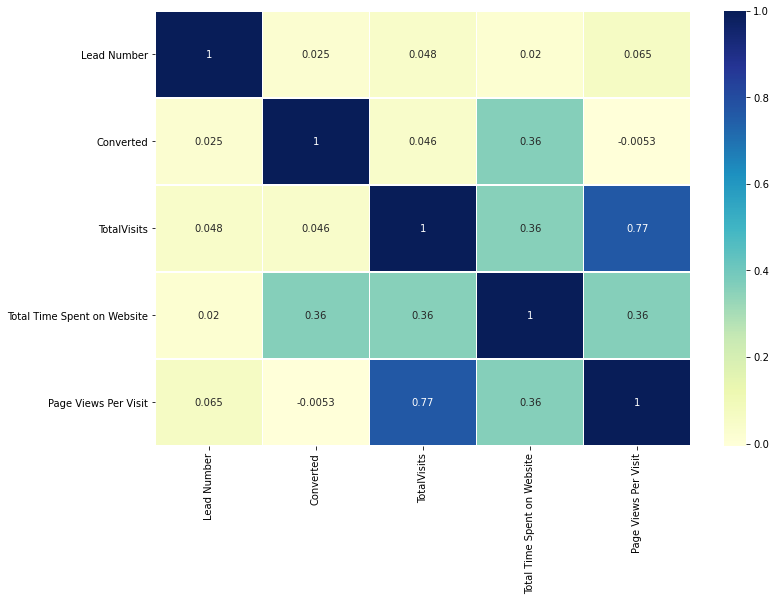

In [99]:
plt.figure(figsize=(12,8))
sns.heatmap(leads_data.corr(),annot = True,linewidths=.5, cmap="YlGnBu")
plt.show()

<b>`INFERENCE: `</b> We can observe there is some what linear relationship between `Page Views Per Visit` and `TotalVisits` with correlation of 77%.

### Final `INFERENCES` From EDA: 
- There are more number of leads with `Landing Page Submission` and `API` as origin, but rate of convertion is close to 30%. Company should focus on improving leads with `Landing Page Submission` as origin.
- Rate of conversion is very high when origin is `Lead Add Form`. Company should focus on getting more leads from these origin.
- Leads that got converted comes mostly from `Direct Traffic`, `Google` sources.
- Rate of conversion is more for leads comming from `Reference` and `Welingak Websites`.So company should more leads from these sources.
- Inorder to improve Converstion rate, company should focus on converting leads comming from `Direct Traffic, Google, Olark Chat, and Organic Search`.
- We can observe that rate of conversion is more for customers who have opted to receive mails regarding course(40% are converted).
- Rate of conversion is more for the customers whose last activity was `SMS Sent`(62% customer got converted ). 
- Where as Rate of conversion is very low for for the customers whose last activity was `Olark Chat Conversation`. Company should focus on improving leads for customers with last activity as `Olark Chat Conversation`.
- Customers who got converted are mostly from India
- Leads who got converted are from `Finance Management` Specialization.
- Rate of conversion is more for leads from `HR Management`, `Marketing Management`, `Finance Management`, `Operation Management`,`Healthcare Management` Specialization.
- Rate of Conversion is very high(92%) for `Working Professionals`. Company should focus on getting more leads who are `Working Professionals`.
- There are more number of leads who are `Unemployed`. But rate of getting converted is almost 33%. SO company should focus on improving leads who are `unemployed`.
- Most leads opted for  `Better Career Prospects` as the reason for choosing a course.
- Most of the leads are form `Mumbai`.But the rate of convertion is almost 37%. Company should improving leads fron Mumbai city.
- Median for converted and not converted leads are the same for `Page Views Per Visit` and `TotalVisits`.
- Leads spending more time on the weblise are more likely to be converted. Website should be made more engaging to make leads spend more time.

#  <font color='blue'>5. Data Preparation</font>
- Binary Variable conversion
- Categorical Variables conversion
- Dropping repeated variable
- Performing test-train split
- Feaure Scaling

In [100]:
leads_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,City,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,India,Not Specified,Unemployed,Better Career Prospects,Mumbai,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,India,Not Specified,Unemployed,Better Career Prospects,Mumbai,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,Mumbai,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,Mumbai,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,India,Not Specified,Unemployed,Better Career Prospects,Mumbai,No,Modified


### 5.1 Binary Variable conversion
There are some columns like `Do Not Email` and `A free copy of Mastering The Interview` have Yes, No values, so we will convert them to 1,0 respectively.

In [101]:
binaryList = ['Do Not Email','A free copy of Mastering The Interview']
# Defining the map function
def binaryMapping(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the list
leads_data[binaryList] = leads_data[binaryList].apply(binaryMapping)

### 5.2 Dummy Variables
We will create dummy variables for categorical variables with more than 2 levels.

In [102]:
var_categorical = ["Lead Origin", "Lead Source", "Last Activity", "Country", "Specialization", "What is your current occupation", "What matters most to you in choosing a course", "City", "Last Notable Activity"]

In [103]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummyList = pd.get_dummies(leads_data[var_categorical], drop_first=True)

# Adding the results to leads_data
leads_data = pd.concat([leads_data, dummyList], axis=1)

### 5.3 Dropping repeated variable

In [104]:
leads_data.drop(var_categorical,axis=1,inplace=True)

In [105]:
leads_data.head()

,Prospect ID,Lead Number,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Country_Others,Country_United Arab Emirates,Country_United States,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Not Specified,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Others,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,0,0,0.0,0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,0,0,5.0,674,2.5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,0,1,2.0,1532,2.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,0,0,1.0,305,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,0,1,2.0,1428,1.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


### 5.4 Performing test-train split

In [106]:
# Creating independant Variable
X = leads_data.drop(['Converted','Prospect ID', 'Lead Number'], axis=1)
X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Country_Others,Country_United Arab Emirates,Country_United States,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Not Specified,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Others,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
0,0,0.0,0,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0,2.0,1532,2.0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,1.0,305,1.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,0,2.0,1428,1.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [107]:
# Creating dependant Variable
y = leads_data['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [108]:
# Splitting the data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### 5.5 Feaure Scaling

In [109]:
# there are 3 variables which are continuous so we will scale them
scaler = StandardScaler()
num_col = ["TotalVisits", "Total Time Spent on Website", "Page Views Per Visit"]
X_train[num_col] = scaler.fit_transform(X_train[num_col])
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Country_Others,Country_United Arab Emirates,Country_United States,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Not Specified,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,What matters most to you in choosing a course_Others,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Others,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed
1871,0,-1.149699,-0.885371,-1.266675,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
6795,0,0.299722,0.005716,-0.516439,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
3516,0,0.662077,-0.691418,0.143543,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
8105,0,0.662077,1.365219,1.553761,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3934,0,-1.149699,-0.885371,-1.266675,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


# <font color='blue'>6. Model Building</font>
- Model 1: using all the variables
- Model 2: Using RFE, with 15 variables
- Model Evaluation
- Finding Optimal Threshold
- Making prediction on the test set

### 6.1 Model 1: using all the variables
We will perform Logistic Regression on all the variables first

In [110]:
log_model1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
log_model1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6400
Model Family:                Binomial   Df Model:                           67
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2578.6
Date:                Tue, 25 May 2021   Deviance:                       5157.1
Time:                        17:05:21   Pearson chi2:                 7.74e+03
No. Iterations:                    19                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    1.4888      0.889      1.674      0.094      -0.254       3.232
Do Not Email                                            -1.1284      0.218     -5.166      0.000      -1.557      -0.700
TotalVisits                                              0.3380      0.056      5.999      0.000       0.228       0.448
Total Time Spent on Website                              1.0754      0.041     26.438      0.000       0.996       1.155
Page Views Per Visit                                    -0.3585      0.062     -5.738      0.000      -0.481      -0.236
A free copy of Mastering The Interview                  -0.2560      0.110     -2.324      0.020      -0.472      -0.040
Lead Origin_Landing Page Submission                     -0.9217      0.140     -6.584      0.000      -1.196      -0.647
Lead Origin_Lead Add Form                                2.8116      0.522      5.387      0.000       1.789       3.834
Lead Origin_Lead Import                                  0.2025      2.188      0.093      0.926      -4.085       4.490
Lead Origin_Quick Add Form                              19.4635   1.77e+04      0.001      0.999   -3.47e+04    3.48e+04
Lead Source_Facebook                                    -0.4191      2.188     -0.192      0.848      -4.707       3.869
Lead Source_Google                                       0.2318      0.117      1.986      0.047       0.003       0.461
Lead Source_Olark Chat                                   1.0993      0.169      6.510      0.000       0.768       1.430
Lead Source_Organic Search                               0.1267      0.135      0.941      0.347      -0.137       0.390
Lead Source_Others                                       0.4620      0.662      0.698      0.485      -0.835       1.759
Lead Source_Reference                                    0.4349      0.560      0.776      0.438      -0.663       1.533
Lead Source_Referral Sites                               0.0644      0.326      0.198      0.843      -0.574       0.703
Lead Source_Welingak Website                             2.8753      0.891      3.228      0.001       1.129       4.621
Last Activity_Email Bounced                             -0.3575      0.494     -0.723      0.470      -1.326       0.611
Last Activity_Email Link Clicked                         0.4576      0.434      1.055      0.291      -0.392       1.307
Last Activity_Email Opened                               0.8882      0.252      3.527      0.000       0.395       1.382
Last Activity_Form Submitted on Website                  0.2001      0.399      0.501      0.616      -0.582       0.982
Last Activity_Had a Phone Conversation                   1

<b>`INFERENCE: `</b>
We can observe that some of the variables have high p-values(they are insignificant). So we will have to get rid of them. In order to do so will will use RFE to eliminate features.

### 6.2 Model 2: Using RFE, with 15 variables
We will perform Logistic Regression using 15 variables that are selected by RFE

In [111]:
logreg = LogisticRegression()
rfe = RFE(logreg, 15) # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [112]:
# columns selected by RFE
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Welingak Website',
       'Last Activity_Had a Phone Conversation', 'Last Activity_Others',
       'Last Activity_SMS Sent', 'Specialization_Hospitality Management',
       'Specialization_Not Specified',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Others', 'Last Notable Activity_Unreachable'],
      dtype='object')

In [113]:
# model 2 building
log_model2 = sm.GLM(y_train,sm.add_constant(X_train[col]), family = sm.families.Binomial())
res = log_model2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2682.9
Date:                Tue, 25 May 2021   Deviance:                       5365.8
Time:                        17:05:49   Pearson chi2:                 7.29e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.2571      0.116      2.215      0.027       0.030       0.485
Do Not Email                                            -1.1764      0.166     -7.087      0.000      -1.502      -0.851
Total Time Spent on Website                              0.9744      0.036     26.900      0.000       0.903       1.045
Lead Origin_Landing Page Submission                     -1.4721      0.121    -12.212      0.000      -1.708      -1.236
Lead Origin_Lead Add Form                                2.7659      0.194     14.266      0.000       2.386       3.146
Lead Source_Welingak Website                             2.4095      0.745      3.232      0.001       0.948       3.870
Last Activity_Had a Phone Conversation                   1.4135      0.862      1.641      0.101      -0.275       3.102
Last Activity_Others                                     1.7817      0.679      2.626      0.009       0.452       3.112
Last Activity_SMS Sent                                   1.3014      0.073     17.727      0.000       1.158       1.445
Specialization_Hospitality Management                   -0.9893      0.325     -3.048      0.002      -1.625      -0.353
Specialization_Not Specified                            -1.1683      0.122     -9.575      0.000      -1.407      -0.929
What is your current occupation_Working Professional     2.6314      0.192     13.736      0.000       2.256       3.007
Last Notable Activity_Modified                          -1.0260      0.079    -13.012      0.000      -1.181      -0.871
Last Notable Activity_Olark Chat Conversation           -0.9880      0.331     -2.985      0.003      -1.637      -0.339
Last Notable Activity_Others                             1.4432      1.039      1.389      0.165      -0.593       3.479
Last Notable Activity_Unreachable                        1.3877      0.516      2.688      0.007       0.376       2.400
========================================================================================================================
"""

In [114]:
# Getting the predicted values on the train set
y_train_pred = res.predict(sm.add_constant(X_train[col]))
y_train_pred.head()

1871    0.353068
6795    0.084885
3516    0.170099
8105    0.804814
3934    0.057327
dtype: float64

In [115]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred.values.reshape(-1)})
y_train_pred_final['CustomerId'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,CustomerId
0,0,0.353068,1871
1,0,0.084885,6795
2,0,0.170099,3516
3,0,0.804814,8105
4,0,0.057327,3934


Let us find the predicted values with a random probability cutoff of 0.5

In [116]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,CustomerId,predicted
0,0,0.353068,1871,0
1,0,0.084885,6795,0
2,0,0.170099,3516,0
3,0,0.804814,8105,1
4,0,0.057327,3934,0


### 6.3 Model Evaluation

#### - VIF

In [117]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Landing Page Submission,1.71
13,Last Notable Activity_Others,1.69
11,Last Notable Activity_Modified,1.67
5,Last Activity_Had a Phone Conversation,1.63
9,Specialization_Not Specified,1.61
7,Last Activity_SMS Sent,1.53
3,Lead Origin_Lead Add Form,1.45
4,Lead Source_Welingak Website,1.26
10,What is your current occupation_Working Profes...,1.17
1,Total Time Spent on Website,1.14


<b>`INFERENCE: `</b> We can see that all variables have vif < 5, So we need not drop variables and can proceed with making predictions using model 2 itself.

### 6.4 Model 3: Dropping Last Notable Activity_Others

Dropping Last Notable Activity_Others columns from list as it has relatively compared to others high p value.Trying to reduce p values to 0.0...

In [118]:
col = col.drop('Last Notable Activity_Others', 1)
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Welingak Website',
       'Last Activity_Had a Phone Conversation', 'Last Activity_Others',
       'Last Activity_SMS Sent', 'Specialization_Hospitality Management',
       'Specialization_Not Specified',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Unreachable'],
      dtype='object')

In [119]:
# model 3 building
log_model3 = sm.GLM(y_train,sm.add_constant(X_train[col]), family = sm.families.Binomial())
res = log_model3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2683.9
Date:                Tue, 25 May 2021   Deviance:                       5367.8
Time:                        17:06:48   Pearson chi2:                 8.02e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.2610      0.116      2.250      0.024       0.034       0.488
Do Not Email                                            -1.1752      0.166     -7.092      0.000      -1.500      -0.850
Total Time Spent on Website                              0.9732      0.036     26.887      0.000       0.902       1.044
Lead Origin_Landing Page Submission                     -1.4723      0.121    -12.218      0.000      -1.708      -1.236
Lead Origin_Lead Add Form                                2.7637      0.194     14.251      0.000       2.384       3.144
Lead Source_Welingak Website                             2.4119      0.745      3.236      0.001       0.951       3.873
Last Activity_Had a Phone Conversation                   2.1983      0.681      3.230      0.001       0.864       3.532
Last Activity_Others                                     1.9631      0.650      3.020      0.003       0.689       3.237
Last Activity_SMS Sent                                   1.2998      0.073     17.711      0.000       1.156       1.444
Specialization_Hospitality Management                   -0.9891      0.324     -3.048      0.002      -1.625      -0.353
Specialization_Not Specified                            -1.1701      0.122     -9.591      0.000      -1.409      -0.931
What is your current occupation_Working Professional     2.6273      0.192     13.717      0.000       2.252       3.003
Last Notable Activity_Modified                          -1.0330      0.079    -13.123      0.000      -1.187      -0.879
Last Notable Activity_Olark Chat Conversation           -0.9904      0.331     -2.993      0.003      -1.639      -0.342
Last Notable Activity_Unreachable                        1.3840      0.516      2.681      0.007       0.372       2.396
========================================================================================================================
"""

In [120]:
# Getting the predicted values on the train set
y_train_pred = res.predict(sm.add_constant(X_train[col]))
y_train_pred.head()

1871    0.354208
6795    0.085033
3516    0.170514
8105    0.804887
3934    0.057125
dtype: float64

In [121]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred.values.reshape(-1)})
y_train_pred_final['CustomerId'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,CustomerId
0,0,0.354208,1871
1,0,0.085033,6795
2,0,0.170514,3516
3,0,0.804887,8105
4,0,0.057125,3934


Let us find the predicted values with a random probability cutoff of 0.5

In [122]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,CustomerId,predicted
0,0,0.354208,1871,0
1,0,0.085033,6795,0
2,0,0.170514,3516,0
3,0,0.804887,8105,1
4,0,0.057125,3934,0


### 6.4 Model Evaluation

#### - VIF

In [123]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Landing Page Submission,1.70
11,Last Notable Activity_Modified,1.66
9,Specialization_Not Specified,1.61
7,Last Activity_SMS Sent,1.53
3,Lead Origin_Lead Add Form,1.45
4,Lead Source_Welingak Website,1.26
10,What is your current occupation_Working Profes...,1.17
1,Total Time Spent on Website,1.14
0,Do Not Email,1.12
12,Last Notable Activity_Olark Chat Conversation,1.06


### 6.5 Model 4: Dropping Last Notable Activity_Unreachable

Dropping Last Notable Activity_Unreachable column from list as it has relatively compared to others high p value.Trying to reduce p values to 0.000...

In [124]:
col = col.drop('Last Notable Activity_Unreachable', 1)
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Welingak Website',
       'Last Activity_Had a Phone Conversation', 'Last Activity_Others',
       'Last Activity_SMS Sent', 'Specialization_Hospitality Management',
       'Specialization_Not Specified',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation'],
      dtype='object')

In [125]:
# model 4 building
log_model4 = sm.GLM(y_train,sm.add_constant(X_train[col]), family = sm.families.Binomial())
res = log_model4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2687.5
Date:                Tue, 25 May 2021   Deviance:                       5375.0
Time:                        17:07:32   Pearson chi2:                 8.01e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.2798      0.116      2.417      0.016       0.053       0.507
Do Not Email                                            -1.1764      0.166     -7.099      0.000      -1.501      -0.852
Total Time Spent on Website                              0.9709      0.036     26.865      0.000       0.900       1.042
Lead Origin_Landing Page Submission                     -1.4774      0.120    -12.265      0.000      -1.713      -1.241
Lead Origin_Lead Add Form                                2.7585      0.194     14.229      0.000       2.379       3.138
Lead Source_Welingak Website                             2.4130      0.745      3.237      0.001       0.952       3.874
Last Activity_Had a Phone Conversation                   2.1884      0.681      3.216      0.001       0.855       3.522
Last Activity_Others                                     1.9591      0.650      3.014      0.003       0.685       3.233
Last Activity_SMS Sent                                   1.2893      0.073     17.605      0.000       1.146       1.433
Specialization_Hospitality Management                   -0.9947      0.324     -3.066      0.002      -1.631      -0.359
Specialization_Not Specified                            -1.1786      0.122     -9.667      0.000      -1.418      -0.940
What is your current occupation_Working Professional     2.6270      0.191     13.721      0.000       2.252       3.002
Last Notable Activity_Modified                          -1.0421      0.079    -13.259      0.000      -1.196      -0.888
Last Notable Activity_Olark Chat Conversation           -1.0022      0.331     -3.029      0.002      -1.651      -0.354
========================================================================================================================
"""

In [126]:
# Getting the predicted values on the train set
y_train_pred = res.predict(sm.add_constant(X_train[col]))
y_train_pred.head()

1871    0.358983
6795    0.085444
3516    0.172210
8105    0.804909
3934    0.057300
dtype: float64

In [127]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred.values.reshape(-1)})
y_train_pred_final['CustomerId'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,CustomerId
0,0,0.358983,1871
1,0,0.085444,6795
2,0,0.172210,3516
3,0,0.804909,8105
4,0,0.057300,3934


Let us find the predicted values with a random probability cutoff of 0.5

In [128]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,CustomerId,predicted
0,0,0.358983,1871,0
1,0,0.085444,6795,0
2,0,0.172210,3516,0
3,0,0.804909,8105,1
4,0,0.057300,3934,0


### 6.5 Model Evaluation

#### - VIF

In [129]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Landing Page Submission,1.70
11,Last Notable Activity_Modified,1.66
9,Specialization_Not Specified,1.61
7,Last Activity_SMS Sent,1.53
3,Lead Origin_Lead Add Form,1.45
4,Lead Source_Welingak Website,1.26
10,What is your current occupation_Working Profes...,1.17
1,Total Time Spent on Website,1.14
0,Do Not Email,1.12
12,Last Notable Activity_Olark Chat Conversation,1.06


### 6.6 Model 5: Dropping Last Activity_Others

Dropping Last Activity_Others column from list as it has relatively compared to others high p value.Trying to reduce p values to 0.000...

In [130]:
col = col.drop('Last Activity_Others', 1)
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Welingak Website',
       'Last Activity_Had a Phone Conversation', 'Last Activity_SMS Sent',
       'Specialization_Hospitality Management', 'Specialization_Not Specified',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation'],
      dtype='object')

In [131]:
# model 5 building
log_model5 = sm.GLM(y_train,sm.add_constant(X_train[col]), family = sm.families.Binomial())
res = log_model5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2692.2
Date:                Tue, 25 May 2021   Deviance:                       5384.3
Time:                        17:07:59   Pearson chi2:                 8.07e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.2741      0.116      2.368      0.018       0.047       0.501
Do Not Email                                            -1.1742      0.165     -7.114      0.000      -1.498      -0.851
Total Time Spent on Website                              0.9714      0.036     26.906      0.000       0.901       1.042
Lead Origin_Landing Page Submission                     -1.4678      0.120    -12.188      0.000      -1.704      -1.232
Lead Origin_Lead Add Form                                2.7723      0.193     14.328      0.000       2.393       3.151
Lead Source_Welingak Website                             2.3920      0.745      3.210      0.001       0.931       3.853
Last Activity_Had a Phone Conversation                   2.1789      0.680      3.202      0.001       0.845       3.513
Last Activity_SMS Sent                                   1.2818      0.073     17.524      0.000       1.138       1.425
Specialization_Hospitality Management                   -1.0008      0.324     -3.085      0.002      -1.637      -0.365
Specialization_Not Specified                            -1.1681      0.122     -9.584      0.000      -1.407      -0.929
What is your current occupation_Working Professional     2.6439      0.192     13.759      0.000       2.267       3.021
Last Notable Activity_Modified                          -1.0284      0.078    -13.136      0.000      -1.182      -0.875
Last Notable Activity_Olark Chat Conversation           -1.0058      0.331     -3.041      0.002      -1.654      -0.358
========================================================================================================================
"""

In [132]:
# Getting the predicted values on the train set
y_train_pred = res.predict(sm.add_constant(X_train[col]))
y_train_pred.head()

1871    0.357568
6795    0.086572
3516    0.172835
8105    0.804460
3934    0.058277
dtype: float64

In [133]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred.values.reshape(-1)})
y_train_pred_final['CustomerId'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,CustomerId
0,0,0.357568,1871
1,0,0.086572,6795
2,0,0.172835,3516
3,0,0.804460,8105
4,0,0.058277,3934


Let us find the predicted values with a random probability cutoff of 0.5

In [134]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,CustomerId,predicted
0,0,0.357568,1871,0
1,0,0.086572,6795,0
2,0,0.172835,3516,0
3,0,0.804460,8105,1
4,0,0.058277,3934,0


### 6.6 Model Evaluation

#### - VIF

In [135]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Landing Page Submission,1.70
10,Last Notable Activity_Modified,1.65
8,Specialization_Not Specified,1.61
6,Last Activity_SMS Sent,1.52
3,Lead Origin_Lead Add Form,1.45
4,Lead Source_Welingak Website,1.26
9,What is your current occupation_Working Profes...,1.17
1,Total Time Spent on Website,1.14
0,Do Not Email,1.12
11,Last Notable Activity_Olark Chat Conversation,1.06


In [136]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3575  427]
 [ 814 1652]]


In [137]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8081323438466296


The overall **accuracy** of this model is around **81%**

In [138]:
# Matrices beyond accuracy
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [139]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6699107866991079

In [140]:
# Let us calculate specificity
TN / float(TN+FP)

0.8933033483258371

**Sensitivity** = 67% and **Specificity** = 89%. 
We will now plot the **ROC curve** to show the tradeoff between sensitivity and specificity.

### - ROC curve

In [141]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [142]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

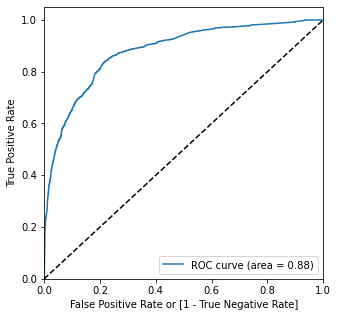

In [143]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

#### A good model should be far away from the diagonal and our model has done a decent job.

### 6.7 Finding Optimal Threshold
Optimal cutoff probability is that prob where we get balanced sensitivity and specificity.

In [144]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,CustomerId,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.357568,1871,0,1,1,1,1,0,0,0,0,0,0
1,0,0.086572,6795,0,1,0,0,0,0,0,0,0,0,0
2,0,0.172835,3516,0,1,1,0,0,0,0,0,0,0,0
3,0,0.804460,8105,1,1,1,1,1,1,1,1,1,1,0
4,0,0.058277,3934,0,1,0,0,0,0,0,0,0,0,0


In [145]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.593692  0.970803  0.361319
0.2   0.2  0.755720  0.889294  0.673413
0.3   0.3  0.799629  0.853204  0.766617
0.4   0.4  0.801175  0.743309  0.836832
0.5   0.5  0.808132  0.669911  0.893303
0.6   0.6  0.801639  0.601379  0.925037
0.7   0.7  0.789734  0.531225  0.949025
0.8   0.8  0.761750  0.416058  0.974763
0.9   0.9  0.716605  0.274128  0.989255


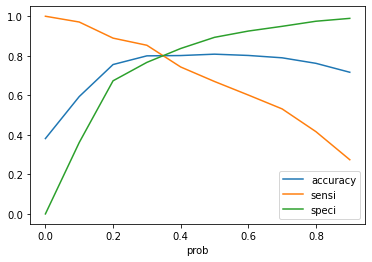

In [146]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

From the above plot, 0.35 seems to be the optomal cutoff probability

In [147]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,CustomerId,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.357568,1871,0,1,1,1,1,0,0,0,0,0,0,1
1,0,0.086572,6795,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0.172835,3516,0,1,1,0,0,0,0,0,0,0,0,0
3,0,0.804460,8105,1,1,1,1,1,1,1,1,1,1,0,1
4,0,0.058277,3934,0,1,0,0,0,0,0,0,0,0,0,0


In [148]:
y_train_pred_final['final_score'] = y_train_pred_final.Converted_Prob.map(lambda x: round(x*100))
y_train_pred_final.head()

,Converted,Converted_Prob,CustomerId,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,final_score
0,0,0.357568,1871,0,1,1,1,1,0,0,0,0,0,0,1,36
1,0,0.086572,6795,0,1,0,0,0,0,0,0,0,0,0,0,9
2,0,0.172835,3516,0,1,1,0,0,0,0,0,0,0,0,0,17
3,0,0.804460,8105,1,1,1,1,1,1,1,1,1,1,0,1,80
4,0,0.058277,3934,0,1,0,0,0,0,0,0,0,0,0,0,6


In [149]:
# checking if 80% cases are correctly predicted based on the converted column.

# get the total of final predicted conversion / non conversion counts from the actual converted rates

checking_df = y_train_pred_final.loc[y_train_pred_final['Converted']==1,['Converted','final_predicted']]
checking_df['final_predicted'].value_counts()

1    2033
0     433
Name: final_predicted, dtype: int64

In [150]:
2033/float(2033+433)

0.82441200324412

#### Insights:
Hence we can see that the final prediction of conversions have a target of 80% conversion as per the X Educations CEO's requirement . Hence this is a good model.

In [151]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8051948051948052

In [152]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3175,  827],
       [ 433, 2033]], dtype=int64)

In [153]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [154]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.82441200324412

In [155]:
# Let us calculate specificity
TN / float(TN+FP)

0.7933533233383309

### Metrics - Precision and Recall

In [156]:
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

In [157]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3575,  427],
       [ 814, 1652]], dtype=int64)

In [158]:
# precision

precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7946127946127947

In [159]:
# recall

recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.6699107866991079

### Precision and recall tradeoff

In [160]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       0
 4       0
        ..
 6463    1
 6464    1
 6465    1
 6466    0
 6467    0
 Name: Converted, Length: 6468, dtype: int64,
 0       0
 1       0
 2       0
 3       1
 4       0
        ..
 6463    1
 6464    1
 6465    0
 6466    0
 6467    0
 Name: predicted, Length: 6468, dtype: int64)

In [161]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

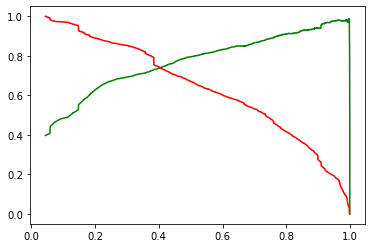

In [162]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Observations:
Train Data: 
Accuracy : 80.52%
Sensitivity : 82.44%
Specificity : 79.34%

### 6.8 Making prediction on the test set

In [163]:
testScaleCol = ["TotalVisits", "Total Time Spent on Website", "Page Views Per Visit"]
X_test[testScaleCol] = scaler.transform(X_test[testScaleCol])

In [164]:
X_test = X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Welingak Website,Last Activity_Had a Phone Conversation,Last Activity_SMS Sent,Specialization_Hospitality Management,Specialization_Not Specified,What is your current occupation_Working Professional,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation
4269,0,0.964504,0,0,0,0,1,0,1,0,0,0
2376,0,-0.885371,0,1,0,0,1,0,1,0,0,0
7766,0,-0.777416,0,0,0,0,0,0,0,1,0,0
9199,0,-0.885371,0,0,0,0,0,0,1,0,1,0
4359,0,-0.885371,0,1,0,0,0,0,0,0,0,0


In [165]:
X_test_sm = sm.add_constant(X_test)

In [166]:
y_test_pred = res.predict(X_test_sm)
y_test_pred.head(10)

4269    0.789976
2376    0.908879
7766    0.896861
9199    0.058277
4359    0.899015
9186    0.578333
1631    0.437049
8963    0.217939
8007    0.077938
5324    0.380487
dtype: float64

In [167]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
4269,0.789976
2376,0.908879
7766,0.896861
9199,0.058277
4359,0.899015


In [168]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [169]:
# Putting CustomerId to index
y_test_df['CustomerId'] = y_test_df.index
y_test_df.head()

,Converted,CustomerId
4269,1,4269
2376,1,2376
7766,1,7766
9199,0,9199
4359,1,4359


In [170]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [171]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

,Converted,CustomerId,0
0,1,4269,0.789976
1,1,2376,0.908879
2,1,7766,0.896861
3,0,9199,0.058277
4,1,4359,0.899015


In [172]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})
y_pred_final.head()

,Converted,CustomerId,Converted_Prob
0,1,4269,0.789976
1,1,2376,0.908879
2,1,7766,0.896861
3,0,9199,0.058277
4,1,4359,0.899015


In [173]:
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.35 else 0)
y_pred_final.head()

,Converted,CustomerId,Converted_Prob,final_predicted
0,1,4269,0.789976,1
1,1,2376,0.908879,1
2,1,7766,0.896861,1
3,0,9199,0.058277,0
4,1,4359,0.899015,1


### 6.9 Model Evaluation on Test Set

In [174]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8106060606060606

In [175]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1342,  335],
       [ 190,  905]], dtype=int64)

In [176]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [177]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8264840182648402

In [178]:
# Let us calculate specificity
TN / float(TN+FP)

0.8002385211687537

### Observations:

Let us compare the values obtained for Train & Test:

Train Data: 
Accuracy : 80.52%
Sensitivity : 82.44%
Specificity : 79.34%

Test Data: 
Accuracy : 81.06%
Sensitivity : 82.65%
Specificity : 80.02%

# <font color='blue'>7. Final score calculation</font>
Now we will assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

In [179]:
y_pred_final['final_score'] = y_pred_final.Converted_Prob * 100
y_pred_final.head()

,Converted,CustomerId,Converted_Prob,final_predicted,final_score
0,1,4269,0.789976,1,78.997604
1,1,2376,0.908879,1,90.887919
2,1,7766,0.896861,1,89.686115
3,0,9199,0.058277,0,5.827721
4,1,4359,0.899015,1,89.901474


In [180]:

# precision
print('precision ',precision_score(y_pred_final.Converted, y_pred_final.final_predicted))

# recall
print('recall ',recall_score(y_pred_final.Converted, y_pred_final.final_predicted))

precision  0.7298387096774194
recall  0.8264840182648402


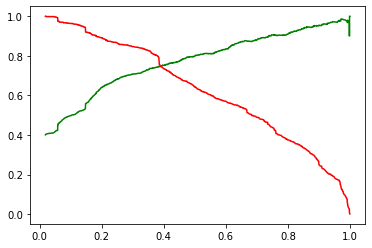

In [181]:
p, r, thresholds = precision_recall_curve(y_pred_final.Converted, y_pred_final.Converted_Prob)

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Conclusion :

- While we have checked both Sensitivity-Specificity as well as Precision and Recall Metrics, we have considered the
  optimal 
  cut off based on Sensitivity and Specificity for calculating the final prediction.
- Accuracy, Sensitivity and Specificity values of test set are around 
  Accuracy : 81.06%
  Sensitivity : 82.65%
  Specificity : 80.02% which are approximately closer to the respective values calculated using trained set.
- Also the lead score calculated in the trained set of data shows the conversion rate on the final predicted model is 
  around 80%
- Hence overall this model seems to be good.